# Comparison of Bidding Types with A/B Test

## Business Problem
Facebook, recently introduced a bidding type called "average bidding" which is an alternative to existing "maximum bidding" type.
One of the clients decided to test this new feature and they want to perform an A/B Test to see if average bidding will provide more turnover than maximum bidding.
A/B Test is taking place for 1 month and the client wants to gain insight one the results of the analysis. Purchase metric is the ultimate succes criteria so it will the main focus on the statistical tests.


## Dataset
The dataset includes information about a website. The number of advertisements clicked and viewed, earnings from the product can be observed in the dataset. There is 2 different datasets which are control and test groups. Maximum bidding is applied to the control test and average bidding is applied to the test group. The variables are as follows:
* **Impression:** Advertisement view count  
* **Click:** Click count on the viewed ad  
* **Purchase:** Purchased product count after ad click  
* **Earning:** Earnings from the prodcuts


In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.width', 225)

In [2]:
# Control and tests groups are assigned from respective sheets.
control_group_ = pd.read_excel("../input/ab-test/ab_testing.xlsx", sheet_name = "Control Group")
test_group_ = pd.read_excel("../input/ab-test/ab_testing.xlsx", sheet_name = "Test Group")

In [3]:
control_group = control_group_.copy()
test_group = test_group_.copy()

In [4]:
# general_info function is written to observe the dataset briefly.
def general_info (dataframe):
    print("------ Shape ------")
    print(dataframe.shape,"\n")
    print("------ Variable Types ------")
    print(dataframe.info(),"\n")
    print("------ Head ------")
    print(dataframe.head(10),"\n")
    print("------ Variables ------")
    print(dataframe.columns,"\n")
    print("------ Statistics ------")
    print(dataframe.describe().T,"\n")
    print("------ Null Value ------")
    print(dataframe.isnull().sum(),"\n")
    

In [5]:
general_info(control_group)

------ Shape ------
(40, 4) 

------ Variable Types ------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB
None 

------ Head ------
    Impression      Click  Purchase    Earning
0  82529.45927 6090.07732 665.21125 2311.27714
1  98050.45193 3382.86179 315.08489 1742.80686
2  82696.02355 4167.96575 458.08374 1797.82745
3 109914.40040 4910.88224 487.09077 1696.22918
4 108457.76263 5987.65581 441.03405 1543.72018
5  77773.63390 4462.20659 519.66966 2081.85185
6  95110.58627 3555.58067 512.92875 1815.00661
7 106649.18307 4358.02704 747.02012 1965.10040
8 122709.71659 5091.55896 745.98568 1651.66299
9  79498.24866 6653.84552 470.50137 2456.30424 

------ V

In [6]:
general_info(test_group)

------ Shape ------
(40, 4) 

------ Variable Types ------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB
None 

------ Head ------
    Impression      Click  Purchase    Earning
0 120103.50380 3216.54796 702.16035 1939.61124
1 134775.94336 3635.08242 834.05429 2929.40582
2 107806.62079 3057.14356 422.93426 2526.24488
3 116445.27553 4650.47391 429.03353 2281.42857
4 145082.51684 5201.38772 749.86044 2781.69752
5 115923.00695 4213.86862 778.37316 2157.40855
6 106116.43664 3279.47297 491.61453 2560.41120
7 125957.11610 4690.56991 855.71980 2563.57976
8 117442.86465 3907.93924 660.47791 2242.23259
9 131271.71560 4721.18781 532.27934 2368.10857 

------ V

In [7]:
# Group variables are added to datasets before merging two groups. This enables us to distinguish two groups in the merged dataset.
control_group["Group"] = "Control"
test_group["Group"] = "Test"

In [8]:
df = pd.concat([control_group,test_group])
df.head()

,Impression,Click,Purchase,Earning,Group
0,82529.45927,6090.07732,665.21125,2311.27714,Control
1,98050.45193,3382.86179,315.08489,1742.80686,Control
2,82696.02355,4167.96575,458.08374,1797.82745,Control
3,109914.40040,4910.88224,487.09077,1696.22918,Control
4,108457.76263,5987.65581,441.03405,1543.72018,Control


In [9]:
general_info(df)

------ Shape ------
(80, 5) 

------ Variable Types ------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 39
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  80 non-null     float64
 1   Click       80 non-null     float64
 2   Purchase    80 non-null     float64
 3   Earning     80 non-null     float64
 4   Group       80 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.8+ KB
None 

------ Head ------
    Impression      Click  Purchase    Earning    Group
0  82529.45927 6090.07732 665.21125 2311.27714  Control
1  98050.45193 3382.86179 315.08489 1742.80686  Control
2  82696.02355 4167.96575 458.08374 1797.82745  Control
3 109914.40040 4910.88224 487.09077 1696.22918  Control
4 108457.76263 5987.65581 441.03405 1543.72018  Control
5  77773.63390 4462.20659 519.66966 2081.85185  Control
6  95110.58627 3555.58067 512.92875 1815.00661  Control
7 106649.18307 4358.02704 

In [10]:
df.groupby("Group").agg(["mean","std","min","max"])

Impression                                           Click                                   Purchase                                  Earning                                
                mean         std         min          max       mean        std        min        max      mean       std       min       max       mean       std        min        max
Group                                                                                                                                                                                   
Control 101711.44907 20302.15786 45475.94296 147539.33633 5100.65737 1329.98550 2189.75316 7959.12507 550.89406 134.10820 267.02894 801.79502 1908.56830 302.91778 1253.98952 2497.29522
Test    120512.41176 18807.44871 79033.83492 158605.92048 3967.54976  923.09507 1836.62986 6019.69508 582.10610 161.15251 311.62952 889.91046 2514.89073 282.73085 1939.61124 3171.48971

<AxesSubplot:title={'center':'Average Earnings of Control and Test Groups'}, xlabel='Group', ylabel='Earning'>

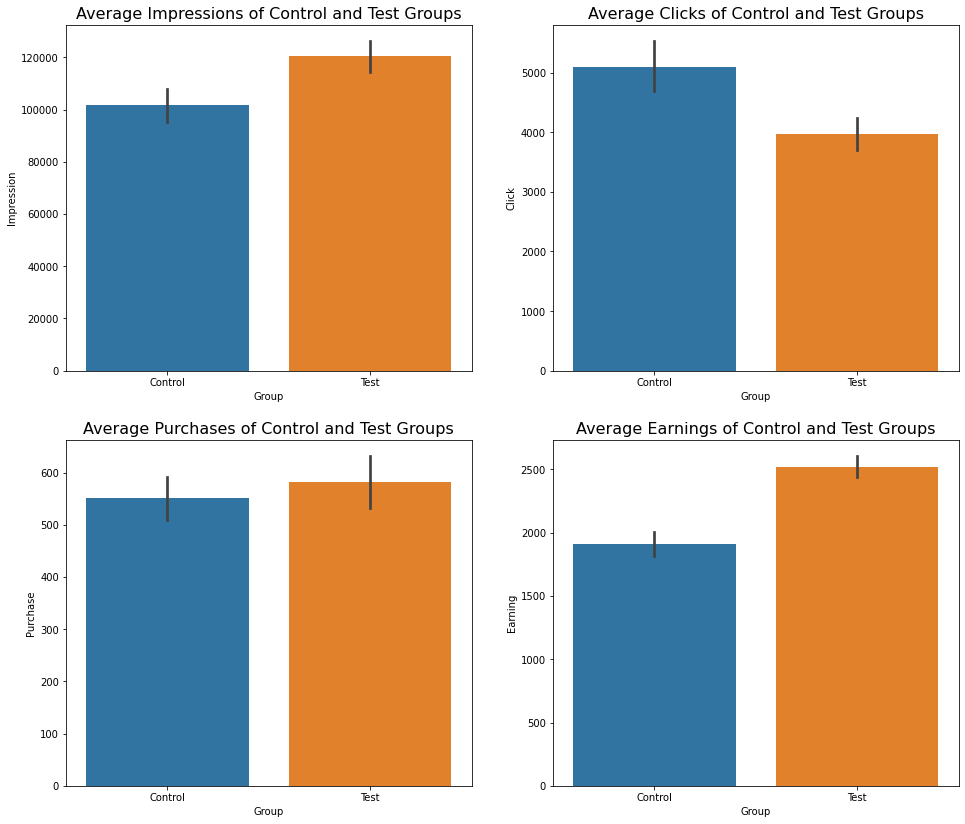

In [11]:
# 2 groups are compared according to variables by plotting.
fig, axes = plt.subplots(2,2,figsize=(16, 14))
axes[0,0].set_title("Average Impressions of Control and Test Groups", fontsize = 16)
axes[0,1].set_title("Average Clicks of Control and Test Groups", fontsize = 16)
axes[1,0].set_title("Average Purchases of Control and Test Groups", fontsize = 16)
axes[1,1].set_title("Average Earnings of Control and Test Groups", fontsize = 16)
sns.barplot(ax=axes[0,0], y = "Impression", x = "Group", data = df)
sns.barplot(ax=axes[0,1], y = "Click", x = "Group", data = df)
sns.barplot(ax=axes[1,0], y = "Purchase", x = "Group", data = df)
sns.barplot(ax=axes[1,1], y = "Earning", x = "Group", data = df)

<AxesSubplot:title={'center':'Earnings Boxplot of Control and Test Groups'}, xlabel='Group', ylabel='Earning'>

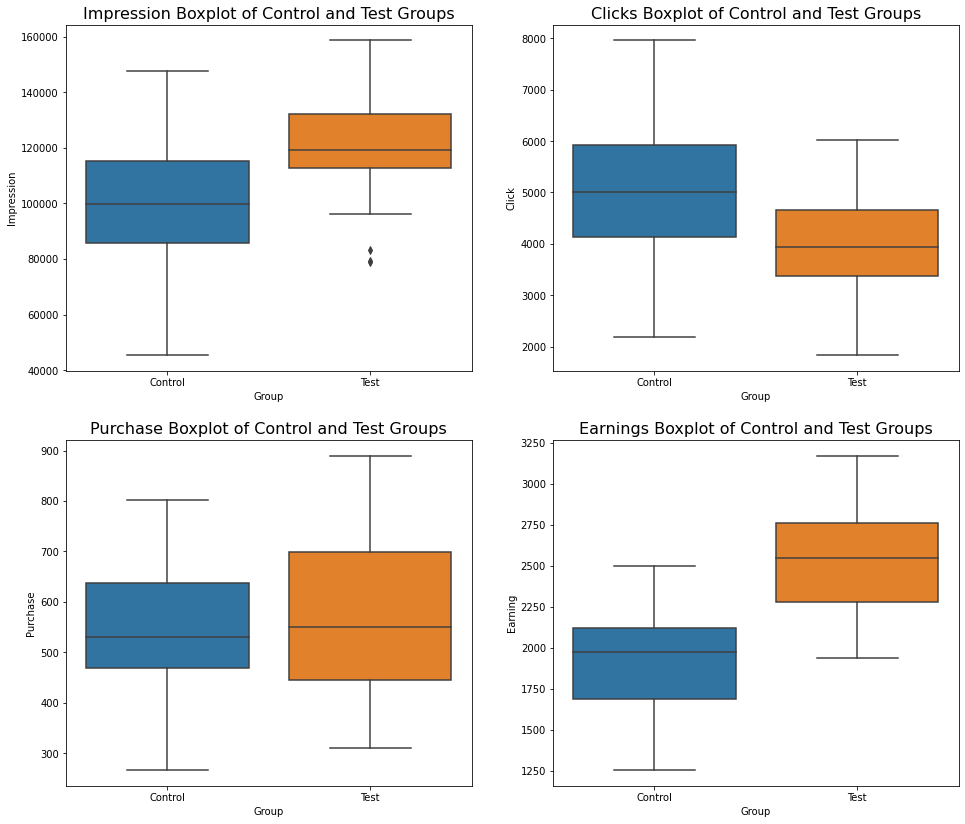

In [12]:
# 2 groups are compared according to variables by plotting.
fig, axes = plt.subplots(2,2,figsize=(16, 14))
axes[0,0].set_title("Impression Boxplot of Control and Test Groups", fontsize = 16)
axes[0,1].set_title("Clicks Boxplot of Control and Test Groups", fontsize = 16)
axes[1,0].set_title("Purchase Boxplot of Control and Test Groups", fontsize = 16)
axes[1,1].set_title("Earnings Boxplot of Control and Test Groups", fontsize = 16)
sns.boxplot(ax=axes[0,0], y = "Impression", x = "Group", data = df)
sns.boxplot(ax=axes[0,1], y = "Click", x = "Group", data = df)
sns.boxplot(ax=axes[1,0], y = "Purchase", x = "Group", data = df)
sns.boxplot(ax=axes[1,1], y = "Earning", x = "Group", data = df)

### 1. Defining Hypotheses
$\rhd$ **H0:** M1 = M2 (There is not any statistical difference between two bidding types in terms of purchase means.)  
$\rhd$ **H1:** M1 != M2 (There is statistical difference between two bidding types in terms of purchase means.)

In [13]:
purchase_mean_control = df.loc[df["Group"]=="Control","Purchase"].mean()
purchase_mean_test = df.loc[df["Group"]=="Test","Purchase"].mean()
print(f"Control Group Purchase Average = {purchase_mean_control}\nTest Group Purchase Average = {purchase_mean_test}")

Control Group Purchase Average = 550.8940587702316
Test Group Purchase Average = 582.1060966484677


### 2. Assumptions
#### 2.1.  Normal Distribution Assumption

$\rhd$ **H0:** Normal distribution assumption is verified.  
$\rhd$ **H1:** Normal distribution assumption is not verified.

In [14]:
# Normal distribution assumption test for control group.
test_stat, pvalue = shapiro(df.loc[df["Group"]=="Control","Purchase"])
print(f'Control Group: \nTest stat= {test_stat}, pvalue {pvalue}\n')

# Normal distribution assumption test for test group.
test_stat, pvalue = shapiro(df.loc[df["Group"]=="Test","Purchase"])
print(f'Test Group: \nTest stat= {test_stat}, pvalue {pvalue}')

Control Group: 
Test stat= 0.9772694110870361, pvalue 0.5891125202178955

Test Group: 
Test stat= 0.9589452147483826, pvalue 0.15413185954093933


$\bigstar$ P values are bigger than 0.05 for both control and test groups. Hypotheses can not be rejected for both groups which indicates normal distribution assumption is verified for both.

#### 2.2. Homogeneity of Variance Assumption
$\rhd$ **H0:** Homogeneity of variance assumption is verified.  
$\rhd$ **H1:** Homogeneity of variance assumption is not verified. 

In [15]:
# Homogeneity of variance assumption test for control and test groups together.
test_stat, pvalue = levene(df.loc[df["Group"]=="Control","Purchase"], df.loc[df["Group"]=="Test","Purchase"])
print(f'Test stat= {test_stat}, pvalue {pvalue}')


Test stat= 2.6392694728747363, pvalue 0.10828588271874791


$\bigstar$ P value is bigger than 0.05. Hypothesis cannot be rejected which indicates homogeneity of variance assumption is verified.

### 3. Application of Hypothesis - AB Test
$\bigstar$ Since both assumptions are verified, AB Test is performed using parametric test which is t-test.

In [16]:
test_stat, pvalue = ttest_ind(df.loc[df["Group"]=="Control","Purchase"], df.loc[df["Group"]=="Test","Purchase"], equal_var=True)
print(f'Test stat= {test_stat}, pvalue {pvalue}')

Test stat= -0.9415584300312964, pvalue 0.34932579202108416


## Insights
As P value is bigger than 0.05, the hypothesis cannot be rejected. It means that, It cannot be denied that there is not any statistical difference between two bidding types in terms of purchase averages. Therefore, it would be illogical to take action according to these results. Moreover, it could be benefical to perform this analysis with time dependency between different periods.